<a href="https://colab.research.google.com/github/harshavardhannarla/esw-project/blob/master/src/model/ESW_CPCB.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib as plt
import numpy as np
from datetime import datetime
from pprint import pprint
from scipy import stats

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import PolynomialFeatures


In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/banrovegrie/banrovegrie.github.io/master/files/data.csv')

In [ ]:
df.head()

,From Date,To Date,PM10,PM2.5
0,01-01-2010 00:00,02-01-2010 00:00,None,None
1,02-01-2010 00:00,03-01-2010 00:00,None,None
2,03-01-2010 00:00,04-01-2010 00:00,None,None
3,04-01-2010 00:00,05-01-2010 00:00,None,None
4,05-01-2010 00:00,06-01-2010 00:00,None,None


In [ ]:
df.dtypes

From Date    object
To Date      object
PM10         object
PM2.5        object
dtype: object

In [ ]:
def dateFormat(dateString):
    return datetime.strptime(dateString, '%d-%m-%Y %H:%M')
    
def dateCheck(dateString):
    try:
        date = datetime.fromisoformat(dateString)
    except:
        date = None
    return date is None

In [ ]:
df.drop(df.index[(df["PM10"] == "None")],axis=0,inplace=True)
df.drop(df.index[(df["PM2.5"] == "None")],axis=0,inplace=True)
df.reset_index(drop=True, inplace=True)
df['From Date'] = df['From Date'].map(dateFormat)
df['To Date'] = df['To Date'].map(dateFormat)
df['PM2.5'] = pd.to_numeric(df['PM2.5'])
df['PM10'] = pd.to_numeric(df['PM10'])

In [ ]:
df

,From Date,To Date,PM10,PM2.5
0,2018-02-01,2018-02-02,502.68,184.35
1,2018-02-02,2018-02-03,407.58,196.88
2,2018-02-03,2018-02-04,374.00,162.05
3,2018-02-04,2018-02-05,391.08,189.44
4,2018-02-05,2018-02-06,510.54,210.00
...,...,...,...,...
1052,2020-12-27,2020-12-28,421.45,272.40
1053,2020-12-28,2020-12-29,280.23,97.50
1054,2020-12-29,2020-12-30,305.64,138.62
1055,2020-12-30,2020-12-31,251.10,179.60


In [ ]:
def plotField(df, field):
    dates = plt.dates.date2num(df['From Date'])

    plt.pyplot.gca().xaxis.set_major_formatter(plt.dates.DateFormatter('%d-%m-%Y'))
    plt.pyplot.gca().xaxis.set_major_locator(plt.ticker.AutoLocator()) 

    plt.pyplot.gca().yaxis.set_major_locator(plt.ticker.AutoLocator()) 

    return plt.pyplot.plot_date(dates, df[field], fmt='o', markersize=3, label=field)

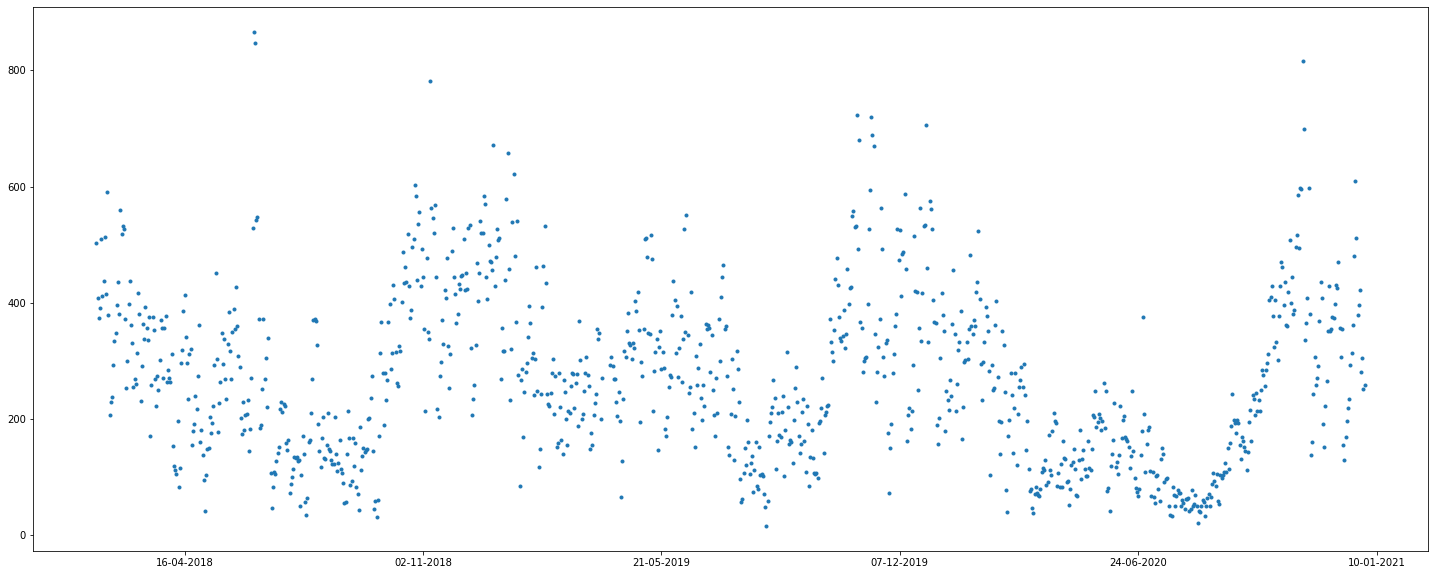

In [ ]:
plt.pyplot.figure(figsize=(25, 10))
plotField(df, 'PM10')

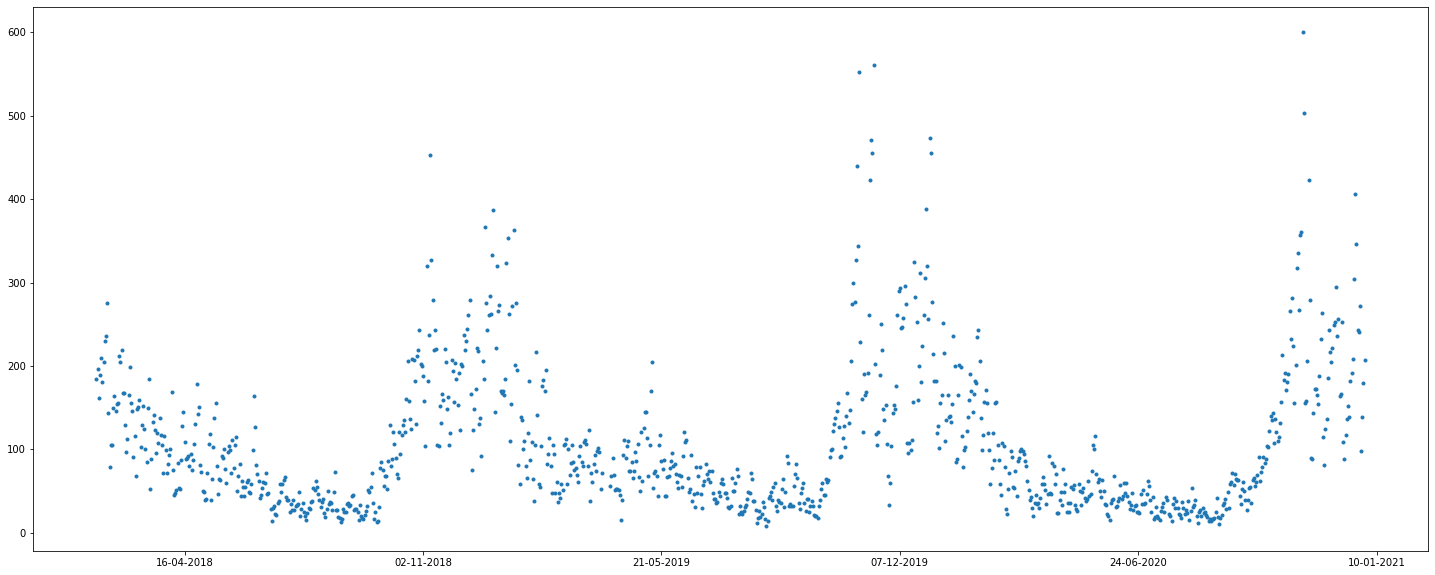

In [ ]:
plt.pyplot.figure(figsize=(25, 10))
plotField(df, 'PM2.5')

In [ ]:
oldDf = df.copy(deep = True)

In [ ]:
def toEpoch(dateObj):
    return float(dateObj.timestamp())

In [ ]:
df =  df.drop(columns=['To Date'])
df.rename(columns={'From Date': 'date'}, inplace=True, errors='raise')
df['date'] = df['date'].map(toEpoch)
df.date = df.date.sub(df.date.min())
df.date = df.date.divide(86400) # seconds in a day

In [ ]:
df

,date,PM10,PM2.5
0,0.0,502.68,184.35
1,1.0,407.58,196.88
2,2.0,374.00,162.05
3,3.0,391.08,189.44
4,4.0,510.54,210.00
...,...,...,...
1052,1060.0,421.45,272.40
1053,1061.0,280.23,97.50
1054,1062.0,305.64,138.62
1055,1063.0,251.10,179.60


# Linear Regression

In [ ]:
x = np.array(df.date.tolist())
x = np.reshape(x, (len(x), 1))
y = np.array(df['PM2.5'].tolist())
y = np.reshape(y, (len(y), 1))
y = y / y.max(axis=0)
assert len(x) == len(y)
x_original = x
y_original = y

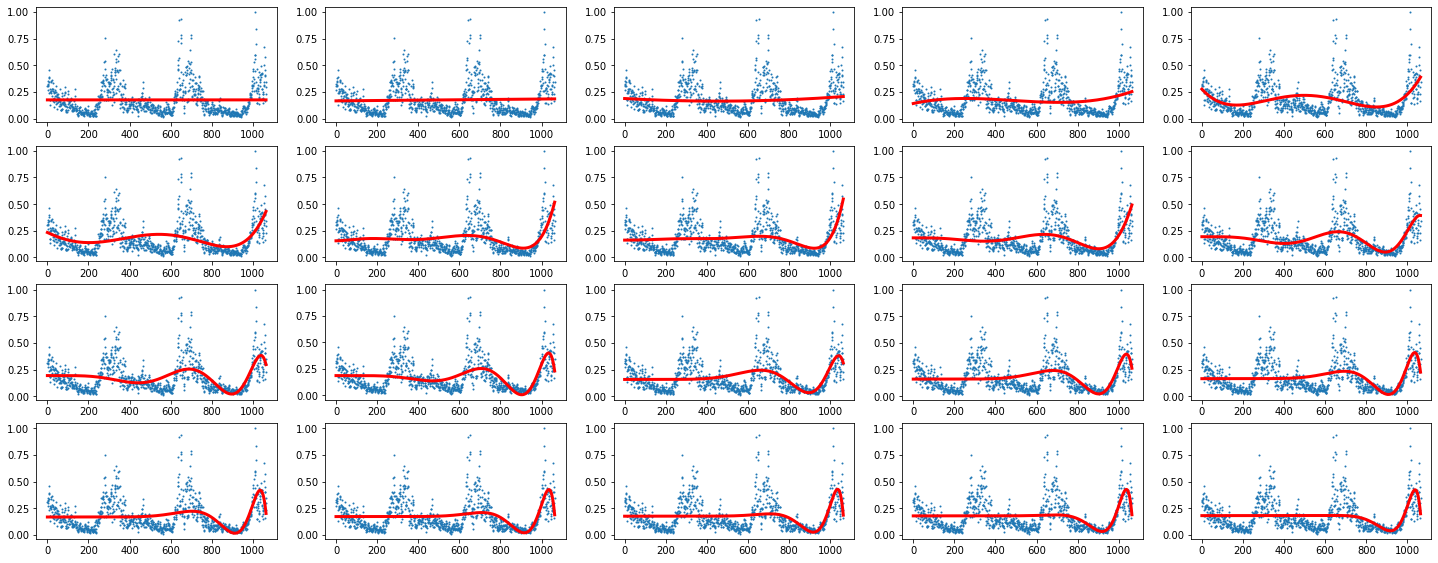

In [ ]:
count = 0
plt.pyplot.figure(figsize=(25, 20))
for i in range(20):

    features = PolynomialFeatures(degree=i)
    x_poly = features.fit_transform(x)
    model = LinearRegression()
    model.fit(x_poly, y)
    y_poly_pred = model.predict(x_poly)

    count += 1
    plt.pyplot.subplot(8, 5, count)
    plt.pyplot.scatter(x_original, y_original, s=1)
    plt.pyplot.plot(x_original, y_poly_pred, linewidth=3, color='r')

In [ ]:
features = PolynomialFeatures(degree=10)
x_poly = features.fit_transform(x)

In [ ]:
from sklearn.svm import SVR
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler, normalize

In [ ]:
y = y.flatten()

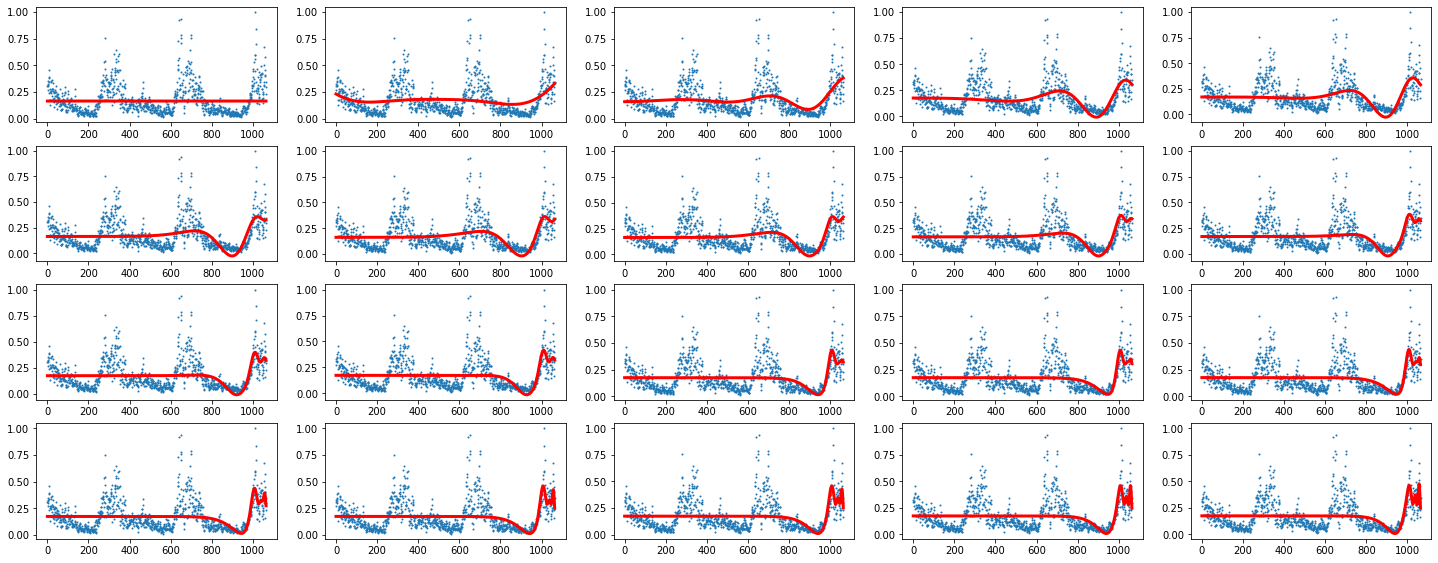

In [ ]:
count = 0
plt.pyplot.figure(figsize=(25, 20))
for i in range(20):
    features = PolynomialFeatures(degree=i)
    x_poly = features.fit_transform(x)
    model = SVR(degree=i)
    model.fit(x_poly, y)
    y_poly_pred = model.predict(x_poly)

    count += 1
    plt.pyplot.subplot(8, 5, count)
    plt.pyplot.scatter(x_original, y_original, s=1)
    plt.pyplot.plot(x_original, y_poly_pred, linewidth=3, color='r')

In [ ]:
y = y_original

In [ ]:
import tensorflow as tf

In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(1, 1)),
    tf.keras.layers.Dense(1000, activation='relu'),
    tf.keras.layers.Dense(1000, activation='relu'),
    tf.keras.layers.Dense(1000, activation='relu'),
    tf.keras.layers.Dense(1)
])

In [ ]:
model.compile(optimizer='SGD',
              loss='mean_absolute_error',
              metrics=['accuracy'])

In [ ]:
history = model.fit(
    x,
    y,
    epochs=4,
    # Suppress logging.
    verbose=0,
    # Calculate validation results on 20% of the training data.
    validation_split = 0.2)

In [ ]:
assert np.all(x == x_original)
assert np.all(y == y_original)

In [ ]:
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch

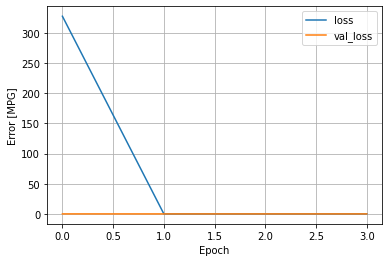

In [ ]:
plt.pyplot.plot(history.history['loss'], label='loss')
plt.pyplot.plot(history.history['val_loss'], label='val_loss')
plt.pyplot.xlabel('Epoch')
plt.pyplot.ylabel('Error [MPG]')
plt.pyplot.legend()
plt.pyplot.grid(True)

In [ ]:
y_pred = model.predict(x_original)

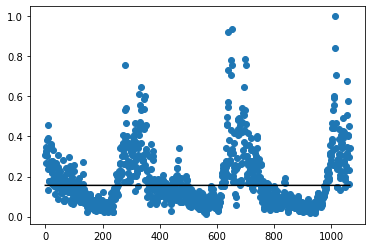

In [ ]:
plt.pyplot.scatter(x_original, y_original, label='Data')
plt.pyplot.plot(x_original, y_pred, color='k', label='Predictions')

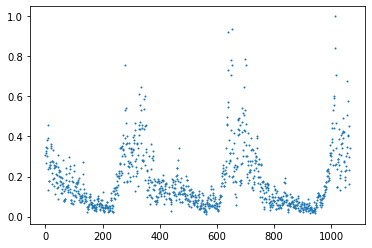

In [ ]:
from scipy import optimize
import matplotlib.pyplot as plt
import numpy as np

plt.scatter(x_original, y_original, s=1)

In [ ]:
import tensorflow as tf
model = tf.keras.Sequential([
    tf.keras.layers.Dense(128, activation='sigmoid'),
    tf.keras.layers.Dense(64, activation='sigmoid'),
    tf.keras.layers.Dense(32, activation='sigmoid'),
    tf.keras.layers.Dense(16, activation='sigmoid'),
    tf.keras.layers.Dense(8, activation='sigmoid'),
    tf.keras.layers.Dense(4, activation='sigmoid'),
    tf.keras.layers.Dense(2, activation='sigmoid'),
    tf.keras.layers.Dense(1)
])
model.compile(loss='mean_squared_error', optimizer=tf.keras.optimizers.Adam(0.1))
model.fit(x_original, y_original, epochs=100, verbose=False)

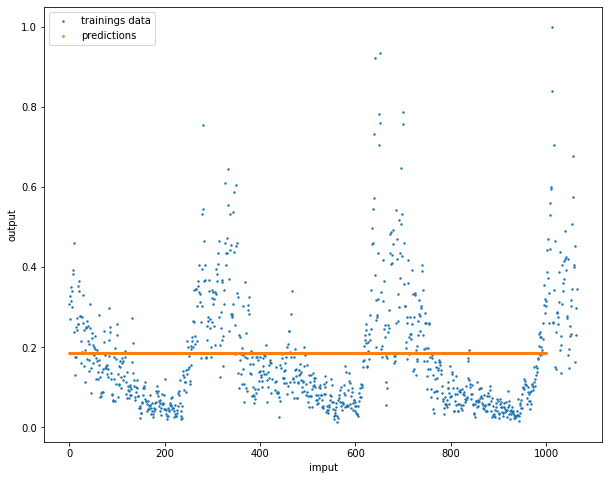

In [ ]:
import matplotlib.pyplot as plt

preds = []
for j in np.linspace(0, 1000, 1000):
  preds.append(model.predict([j]))

fig, ax = plt.subplots()
fig.set_size_inches(10, 8)
plt.xlabel('imput')
plt.ylabel("output")
plt.scatter(x_original, y_original, s=2, label="trainings data")
plt.scatter(np.linspace(0, 1000, 1000), preds, s=3, label="predictions")
plt.legend()

In [ ]:
from tensorflow import keras

model = keras.Sequential()
model.add(keras.layers.Dense(units = 1, activation = 'linear', input_shape=[1]))
model.add(keras.layers.Dense(units = 128, activation = 'sigmoid'))
model.add(keras.layers.Dense(units = 128, activation = 'relu'))
model.add(keras.layers.Dense(units = 128, activation = 'sigmoid'))
model.add(keras.layers.Dense(units = 64, activation = 'relu'))
model.add(keras.layers.Dense(units = 128, activation = 'sigmoid'))
model.add(keras.layers.Dense(units = 128, activation = 'relu'))
model.add(keras.layers.Dense(units = 128, activation = 'sigmoid'))
model.add(keras.layers.Dense(units = 64, activation = 'relu'))
model.add(keras.layers.Dense(units = 1, activation = 'linear'))

opt = keras.optimizers.Adam(learning_rate=0.0001)
model.compile(optimizer=opt, loss='mse')
# model.compile(optimizer="Adam", loss="mse", metrics=["mae"])

# model.summary()

Error:  tf.Tensor(
[4.1505373e-08 3.7944099e-04 1.6525978e-03 ... 1.0942357e-02 1.3338283e-03
 7.4161529e-05], shape=(1057,), dtype=float32)


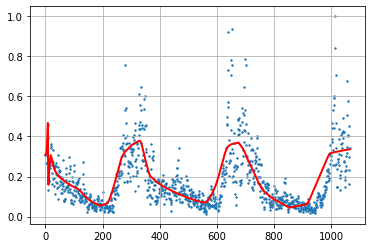

In [ ]:
model.fit(x_original, y_original, epochs=1000, verbose=False)
y_predicted = model.predict(x_original)
print("Error: ", keras.metrics.mean_squared_error(y_original, y_predicted))
plt.scatter(x_original[::1], y_original[::1], s=2)
plt.plot(x_original, y_predicted, 'r', linewidth=2)
plt.grid()
plt.show()

Error:  tf.Tensor([0.00029759 0.00131915 0.00061294 ... 0.01679708 0.0039567  0.00036645], shape=(1057,), dtype=float32)


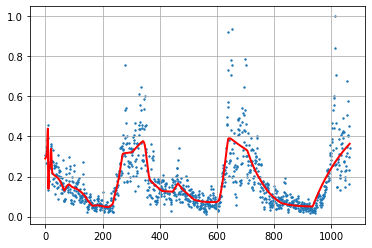

In [ ]:
# for i in range(1, 5000):
model.fit(x_original, y_original, epochs=960, verbose=False)
y_predicted = model.predict(x_original)
print("Error: ", keras.metrics.mean_squared_error(y_original, y_predicted))
plt.scatter(x_original[::1], y_original[::1], s=2)
plt.plot(x_original, y_predicted, 'r', linewidth=2)
plt.grid()
plt.show()